# **Fire Forest Prediction**

#### Muhammad Hendrawan Hidayat - Intermediate Machine Learning (Batch 6)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.optimizers import SGD, RMSprop, Adam, Adamax
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [3]:
plt.style.use('seaborn')

### Data Understanding

### Data Loading

In [67]:
missing_values = ["?", "--"]
df = pd.read_csv('forestfires.csv',
                 na_values = missing_values)

In [68]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [69]:
print('Jumlah Data=', df.shape[0])
print('Jumlah Features =', df.shape[1])

Jumlah Data= 517
Jumlah Features = 13


In [70]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [72]:
df['area'].unique()

array([0.00000e+00, 3.60000e-01, 4.30000e-01, 4.70000e-01, 5.50000e-01,
       6.10000e-01, 7.10000e-01, 7.70000e-01, 9.00000e-01, 9.50000e-01,
       9.60000e-01, 1.07000e+00, 1.12000e+00, 1.19000e+00, 1.36000e+00,
       1.43000e+00, 1.46000e+00, 1.56000e+00, 1.61000e+00, 1.63000e+00,
       1.64000e+00, 1.69000e+00, 1.75000e+00, 1.90000e+00, 1.94000e+00,
       1.95000e+00, 2.01000e+00, 2.14000e+00, 2.29000e+00, 2.51000e+00,
       2.53000e+00, 2.55000e+00, 2.57000e+00, 2.69000e+00, 2.74000e+00,
       3.07000e+00, 3.50000e+00, 4.53000e+00, 4.61000e+00, 4.69000e+00,
       4.88000e+00, 5.23000e+00, 5.33000e+00, 5.44000e+00, 6.38000e+00,
       6.83000e+00, 6.96000e+00, 7.04000e+00, 7.19000e+00, 7.30000e+00,
       7.40000e+00, 8.24000e+00, 8.31000e+00, 8.68000e+00, 8.71000e+00,
       9.41000e+00, 1.00100e+01, 1.00200e+01, 1.09300e+01, 1.10600e+01,
       1.12400e+01, 1.13200e+01, 1.15300e+01, 1.21000e+01, 1.30500e+01,
       1.37000e+01, 1.39900e+01, 1.45700e+01, 1.54500e+01, 1.720

In [73]:
df['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [74]:
df['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

### Feature Extraction

In [75]:
# Extract month and date feature into season and week feature

df['season'] = df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                                ('winter','winter','spring','spring','spring','summer','summer','summer','autumn','autumn','autumn','winter'))
df['week'] = df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),
                            ('weekday','weekday','weekday','weekday','weekday','weekend','weekend'))
df["area"] = np.where(df["area"] > 0, 1, 0)

In [76]:
df.drop(['month', 'day'], axis=1, inplace=True)

In [77]:
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,season,week
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0,spring,weekday
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,autumn,weekday
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,autumn,weekend
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0,spring,weekday
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,spring,weekend


In [78]:
# Encode categorical data

ss_dummies = pd.get_dummies(df['season'], prefix = 'ss')
week_dummies = pd.get_dummies(df['week'], prefix = 'week')

df = pd.concat([df , ss_dummies, week_dummies], axis = 1)

df.drop(['season', 'week'], axis=1, inplace=True)

In [79]:
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,ss_autumn,ss_spring,ss_summer,ss_winter,week_weekday,week_weekend
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0,0,1,0,0,1,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,1,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,1,0,0,0,0,1
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0,0,1,0,0,1,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,1,0,0,0,1


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X             517 non-null    int64  
 1   Y             517 non-null    int64  
 2   FFMC          517 non-null    float64
 3   DMC           517 non-null    float64
 4   DC            517 non-null    float64
 5   ISI           517 non-null    float64
 6   temp          517 non-null    float64
 7   RH            517 non-null    int64  
 8   wind          517 non-null    float64
 9   rain          517 non-null    float64
 10  area          517 non-null    int32  
 11  ss_autumn     517 non-null    uint8  
 12  ss_spring     517 non-null    uint8  
 13  ss_summer     517 non-null    uint8  
 14  ss_winter     517 non-null    uint8  
 15  week_weekday  517 non-null    uint8  
 16  week_weekend  517 non-null    uint8  
dtypes: float64(7), int32(1), int64(3), uint8(6)
memory usage: 45.6 KB


### Explore Data

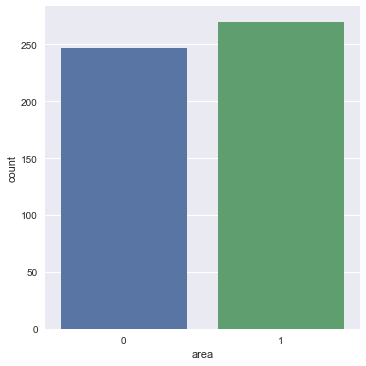

In [109]:
# Target Distribution

sns.catplot(x = 'area',
          data = df, kind = 'count')

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>],
       [<AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>],
       [<AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'ss_autumn'}>],
       [<AxesSubplot:title={'center':'ss_spring'}>,
        <AxesSubplot:title={'center':'ss_summer'}>,
        <AxesSubplot:title={'center':'ss_winter'}>,
        <AxesSubplot:title={'center':'week_weekday'}>],
       [<AxesSubplot:title={'center':'week_weekend'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

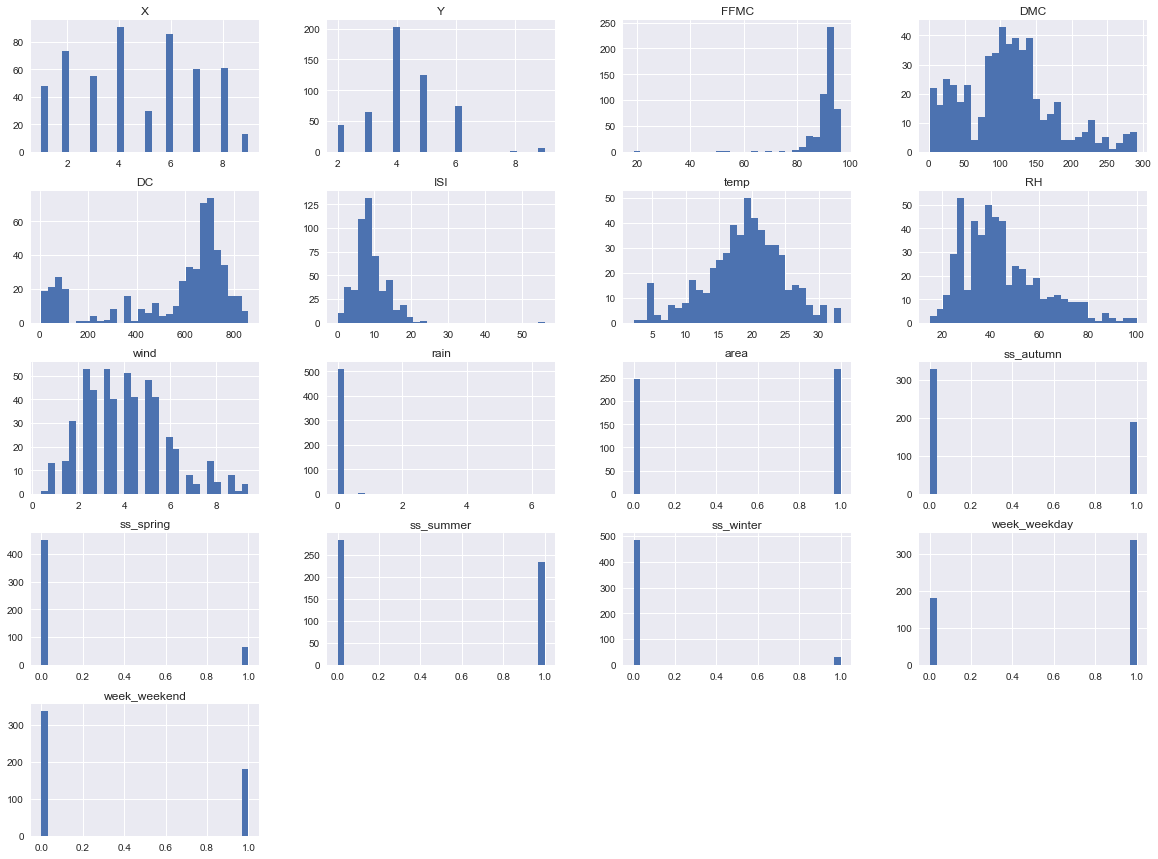

In [18]:
df.hist(bins=30, figsize=(20,15))

<AxesSubplot:>

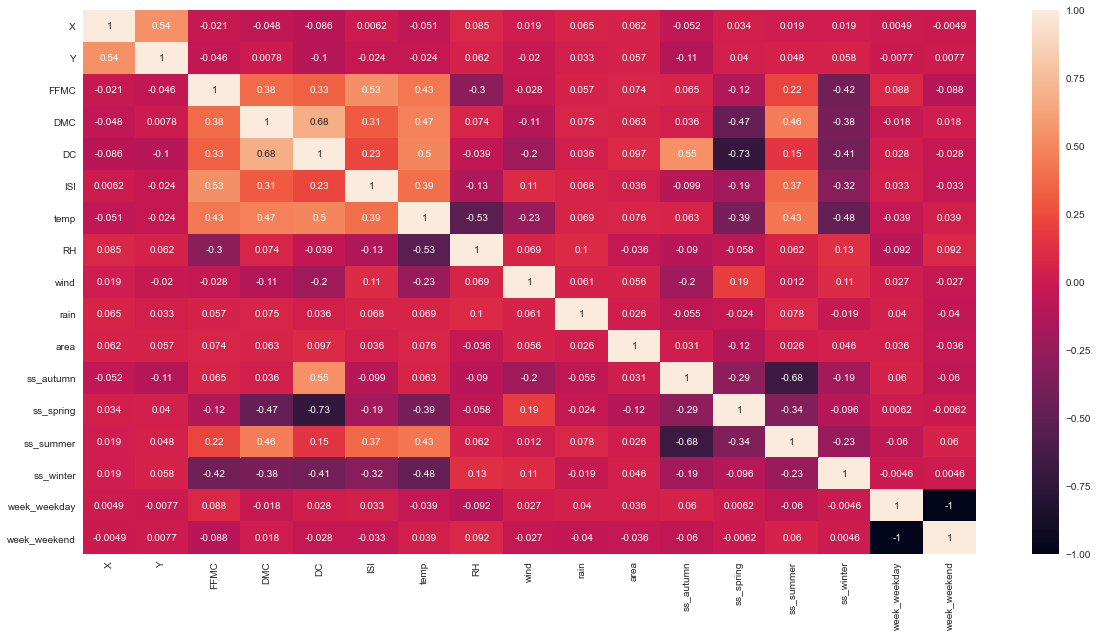

In [21]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

### Feature Selection

In [81]:
feature = df.drop('area', axis=1)

In [82]:
label = df['area']

In [83]:
# Sorting Correlation Among Features to Target

feature_corr = abs(corr['area']).sort_values(ascending=False)
feature_corr

area            1.000000
ss_spring       0.116165
DC              0.096724
temp            0.076047
FFMC            0.073823
DMC             0.062672
X               0.062491
Y               0.056892
wind            0.055702
ss_winter       0.045839
week_weekday    0.036476
week_weekend    0.036476
ISI             0.035663
RH              0.035587
ss_autumn       0.030735
ss_summer       0.025816
rain            0.025550
Name: area, dtype: float64

In [84]:
# Drop < 0.3 Correlation Features

feature.drop(['RH', 'ISI', 'rain'], axis=1, inplace = True)

In [85]:
feature

,X,Y,FFMC,DMC,DC,temp,wind,ss_autumn,ss_spring,ss_summer,ss_winter,week_weekday,week_weekend
0,7,5,86.2,26.2,94.3,8.2,6.7,0,1,0,0,1,0
1,7,4,90.6,35.4,669.1,18.0,0.9,1,0,0,0,1,0
2,7,4,90.6,43.7,686.9,14.6,1.3,1,0,0,0,0,1
3,8,6,91.7,33.3,77.5,8.3,4.0,0,1,0,0,1,0
4,8,6,89.3,51.3,102.2,11.4,1.8,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,27.8,2.7,0,0,1,0,0,1
513,2,4,81.6,56.7,665.6,21.9,5.8,0,0,1,0,0,1
514,7,4,81.6,56.7,665.6,21.2,6.7,0,0,1,0,0,1
515,1,4,94.4,146.0,614.7,25.6,4.0,0,0,1,0,0,1


In [86]:
n_feature = feature.shape[1]

### Data Modeling

In [87]:
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size = 0.3, random_state = 78)

In [88]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## **Experiment**

### First Experiment

First experiment will train models with difference activation functions

In [89]:
# fit a model and plot learning curve

def fit_first_model(x_train, y_train, x_test, y_test, act):

    # define model
    first_model = Sequential()
    first_model.add(Dense(32, input_dim=n_feature, activation=act, kernel_initializer='he_normal'))
    first_model.add(Dense(16, activation=act, kernel_initializer='he_normal'))
    first_model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    optimizer = Adam()
    first_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # fit model
    history = first_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=250, batch_size=len(x_train), verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('activation function='+str(act))
    plt.ylim(0, 1)
    plt.legend()

In [90]:
# create learning curves for different activation function

act = ['relu', 'tanh', 'elu', 'softmax']

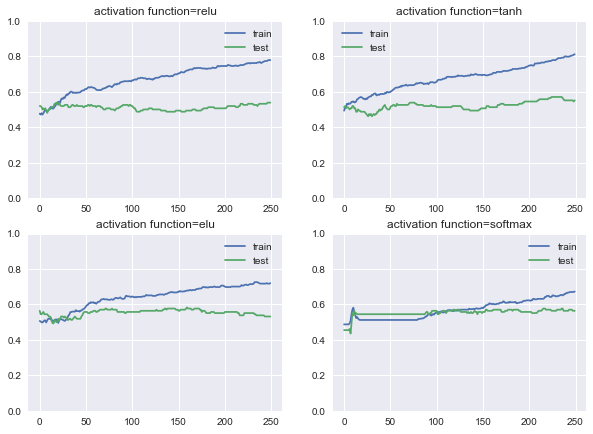

In [91]:
plt.figure(figsize=(10, 15))
for i in range(len(act)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_first_model(x_train, y_train, x_test, y_test, act[i])

# show learning curves
plt.show()

### Second Experiment

Second experiment will train models with difference epochs

In [92]:
# fit a model and plot learning curve

def fit_second_model(x_train, y_train, x_test, y_test, epoch):

    # define model
    second_model = Sequential()
    second_model.add(Dense(32, input_dim=n_feature, activation='relu', kernel_initializer='he_normal'))
    second_model.add(Dense(16, activation='relu', kernel_initializer='he_normal'))
    second_model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    optimizer = Adamax()
    second_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # fit model
    history = second_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch, batch_size=len(x_train), verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('epoch='+str(epoch))
    plt.ylim(0, 1)
    plt.legend()

In [93]:
# create learning curves for different epochs

epoch = [100, 150, 200, 250, 300, 350, 400, 450]

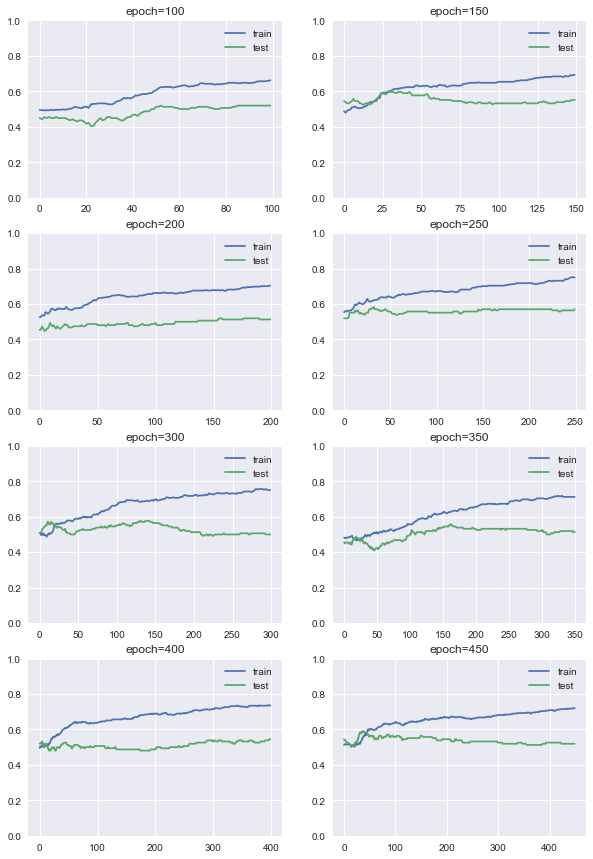

In [94]:
plt.figure(figsize=(10, 15))
for i in range(len(epoch)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(x_train, y_train, x_test, y_test, epoch[i])

# show learning curves
plt.show()

### Third Experiment

Third experiment will train models with difference batch sizes

In [95]:
# fit a model and plot learning curve

def fit_third_model(x_train, y_train, x_test, y_test, batch):

    # define model
    third_model = Sequential()
    third_model.add(Dense(32, input_dim=n_feature, activation='relu', kernel_initializer='he_normal'))
    third_model.add(Dense(16, activation='relu', kernel_initializer='he_normal'))
    third_model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    optimizer = Adamax()
    third_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # fit model
    history = third_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=400, batch_size=batch, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('batch size='+str(batch))
    plt.ylim(0, 1)
    plt.legend()

In [96]:
# create learning curves for different batch size

batch = [1, 8, 16, 32, 64, 128, 256, len(x_train)]

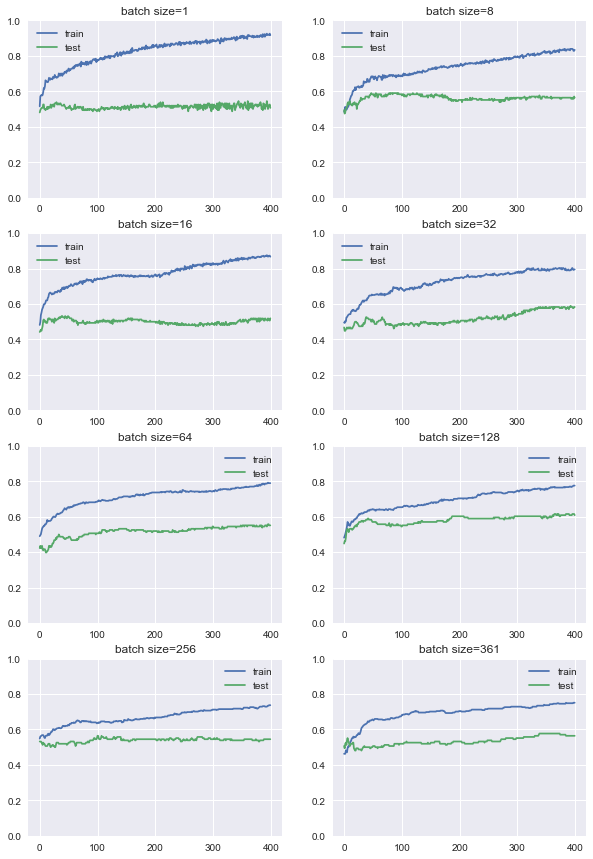

In [97]:
plt.figure(figsize=(10, 15))
for i in range(len(batch)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_third_model(x_train, y_train, x_test, y_test, batch[i])

# show learning curves
plt.show()

### Fourth Experiment

Fourth experiment will train models with difference learning rates

In [98]:
# fit a model and plot learning curve

def fit_fourth_model(x_train, y_train, x_test, y_test, lr):

    # define model
    fourth_model = Sequential()
    fourth_model.add(Dense(32, input_dim=n_feature, activation='relu', kernel_initializer='he_normal'))
    fourth_model.add(Dense(16, activation='relu', kernel_initializer='he_normal'))
    fourth_model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    optimizer = Adamax(lr=lr)
    fourth_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # fit model
    history = fourth_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=400, batch_size=len(x_train), verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('lr='+str(lr))
    plt.ylim(0, 1)
    plt.legend()

In [99]:
# create learning curves for different learning rate

lr = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]

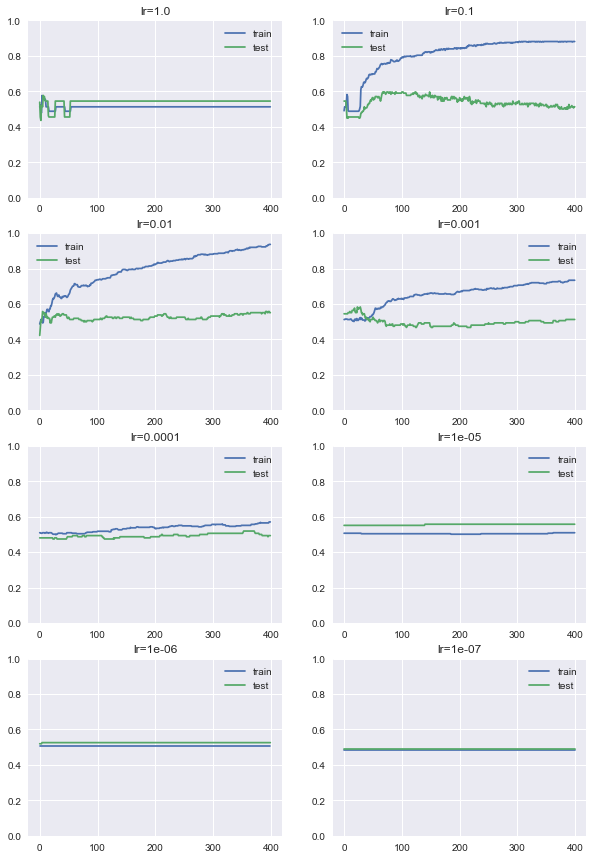

In [100]:
plt.figure(figsize=(10, 15))
for i in range(len(lr)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_fourth_model(x_train, y_train, x_test, y_test, lr[i])

# show learning curves
plt.show()

### Fifth Experiment

Fifth experiment will train models with difference optimizers

In [101]:
# fit a model and plot learning curve
def fit_fifth_model(x_train, y_train, x_test, y_test, optimizer):
    
    # define model
    fifth_model = Sequential()
    fifth_model.add(Dense(32, input_dim=n_feature, activation='relu', kernel_initializer='he_normal'))
    fifth_model.add(Dense(16, activation='relu', kernel_initializer='he_normal'))
    fifth_model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    fifth_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    # fit model
    history = fifth_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=400, batch_size=len(x_train), verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('opt='+optimizer)
    plt.ylim(0, 1)
    plt.legend()

In [106]:
# create learning curves for different optimizers
momentums = ['sgd', 'rmsprop', 'adamax', 'adam']

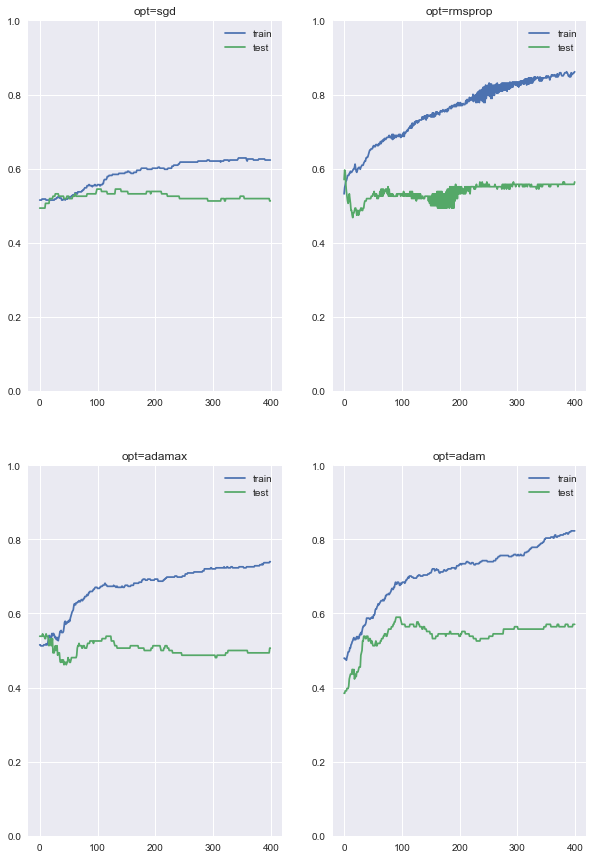

In [107]:
plt.figure(figsize=(10, 15))
for i in range(len(momentums)):
    
    # determine the plot number
    plot_no = 220 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for an optimizer
    fit_fifth_model(x_train, y_train, x_test, y_test, momentums[i])
    
# show learning curves
plt.show()

### Sixth Experiment

Sixth experiment will train models with increase hidden layer

Train: 0.620, Valid: 0.590


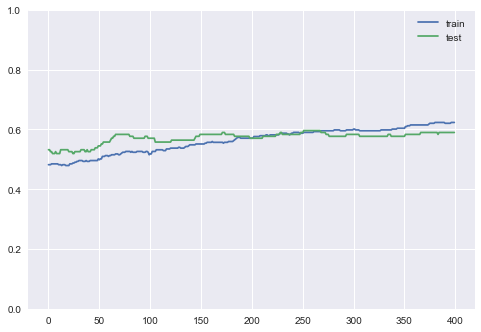

In [105]:
# fit a model and plot learning curve

def fit_sixth_model(x_train, y_train, x_test, y_test):

    # define model
    sixth_model = Sequential()
    sixth_model.add(Dense(16, input_dim=n_feature, activation='relu', kernel_initializer='he_normal'))
    sixth_model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
    sixth_model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    optimizer = SGD(lr=0.001, momentum = 0.9)
    sixth_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # fit model
    history = sixth_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=400, batch_size=len(x_train), verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.ylim(0, 1)
    plt.legend()
    
    # evaluate the model
    _, train_acc = sixth_model.evaluate(x_train, y_train, verbose=0)
    _, valid_acc = sixth_model.evaluate(x_test, y_test, verbose=0)
    print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

fit_sixth_model(x_train, y_train, x_test, y_test)